In [5]:
'''
Anormaly Detection based on Sandy Hurricane on Tweet Data

Author: Ran JU
'''
#import the requirment package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#read data
df = pd.read_csv('newdata.csv')
df

,TweetID,replyToTweet,fromUser,toUser,mentions,text,createdAt,latitude,longitude
0,262988284710506496,NaN,64866824,550239708.0,NaN,@WestonZarek won't let me watch the weather ch...,Mon Oct 29 18:44:27 +0000 2012,42.629031,-73.118634
1,263130135941746689,NaN,749674142,NaN,NaN,Snowball fight in a hurricane!\r @Vision_of_Zeus,Tue Oct 30 04:08:07 +0000 2012,39.649457,-78.930547
2,263077843775406081,NaN,16478800,NaN,NaN,Power out in manhattan #sandy,Tue Oct 30 00:40:20 +0000 2012,40.736017,-73.986944
3,262980922989756416,NaN,305677904,NaN,NaN,Sandy fuck up my day,Mon Oct 29 18:15:12 +0000 2012,38.959940,-76.867793
4,263083083685830656,NaN,911222204,NaN,NaN,Wind still blowin' @jersey shore # sandy,Tue Oct 30 01:01:09 +0000 2012,41.206489,-77.255334
5,262717568794640384,NaN,911222204,NaN,NaN,Hurricane Sandy heading for Jersey Shore!,Mon Oct 29 00:48:44 +0000 2012,41.206376,-77.255282
6,262660163260014592,NaN,26772917,NaN,NaN,"Hey Sandy, #bringit",Sun Oct 28 21:00:37 +0000 2012,40.821170,-73.939547
7,263326083502452736,NaN,403335676,NaN,NaN,"This is stupid, I wanted a storm",Tue Oct 30 17:06:45 +0000 2012,39.672446,-75.748374
8,263098420733022211,NaN,724936718,NaN,NaN,Sandy is not playing,Tue Oct 30 02:02:06 +0000 2012,39.390322,-77.421045
9,251170777024589827,NaN,262728820,NaN,NaN,I hate thunderstorms,Thu Sep 27 04:05:54 +0000 2012,39.950742,-74.930748


In [7]:
from textblob import TextBlob
import math
import re

In [8]:
# this function is to eliminate the unuseful character
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [9]:
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0: # if the message is positive
        return 1
    elif analysis.sentiment.polarity == 0: # if the message is netural
        return 0
    else:
        return -1 # if the message is negative

In [10]:
SA = np.zeros(100012)
# create a new column that represent the result of sentiment analysis
for i in range(100012):
    if df['text'][i] != df['text'][i]:
        continue
    else:
        SA[i] = analize_sentiment(df['text'][i])
        #print(i)



In [11]:
# create new column named "SA" means sentiment analysis
# 1 means positive msg
# 0 means netural msg
# -1 means negative msg
df['SA'] = SA
d


In [12]:
month = [None]*100012
day = np.zeros(100012)
for i in range(100012):
    words = df['createdAt'][i].split()
#     if(words[1] == 'Oct'):
#         month[i] = '10'
#     elif(words[1] == 'Sep'):
#         month[i] = '9'
#     elif(words[1] == 'Nov'):
#         month[i] = '11'
#     elif(words[1] == 'Aug'):
#         month[i] = '8'
#     elif(words[1] == 'Dec'):
#         month[i] = '12'
    month[i] = words[1]
    day[i] = words[2]
df['month'] = month
df['day'] = day


#Classify the data based on the date and the count
a = df.groupby(['month','day'],as_index=True).count()

a = a.reset_index()
a
# the result is group by the date (month and day)

,month,day,TweetID,replyToTweet,fromUser,toUser,mentions,text,createdAt,latitude,longitude,SA
0,Apr,1.0,4,0,4,1,0,4,4,4,4,4
1,Apr,2.0,1,0,1,0,0,1,1,1,1,1
2,Apr,3.0,1,0,1,0,0,1,1,1,1,1
3,Apr,4.0,3,0,3,0,0,3,3,3,3,3
4,Apr,5.0,3,0,3,0,0,3,3,3,3,3
5,Apr,6.0,1,1,1,1,0,1,1,1,1,1
6,Apr,7.0,2,0,2,0,0,2,2,2,2,2
7,Apr,9.0,1,0,1,0,0,1,1,1,1,1
8,Apr,12.0,1,0,1,0,0,1,1,1,1,1
9,Apr,13.0,3,0,3,0,0,3,3,3,3,3


In [13]:
# print(df[(df['month']=='Oct')&(df['day']==1)])
# See the data from 2012.09.01-2012.12.31
# create two arrays that length is 107
SA_pos_portion = np.zeros(107)
SA_neg_portion = np.zeros(107)



In [14]:
# I just analysis the date from Sept to Dec
index = 0
month_index = ['Sep','Oct','Nov','Dec']
for i in month_index:    
    for j in range(32):       
        temp = df[((df['month'] == i) & (df['day'] == j) ) ]    
        row, column = temp.shape
        if(row ==0 or row ==1): # if the date is not exisit
            continue
        else:
            #position portion in the specific date
            SA_pos_portion[index] = sum(temp['SA'] > 0)*100/len(temp['text'])
            #negative portion in the specific date
            SA_neg_portion[index] = sum(temp['SA'] < 0)*100/len(temp['text']) 
            index = index +1 
 

In [15]:
import matplotlib.pyplot as plt


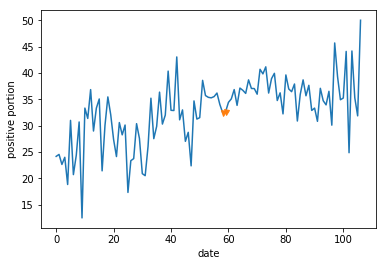

In [16]:
#draw the line chart, xlabel is date from 2012.09.01 to 2012.12.15
plt.plot(range(107), SA_pos_portion, '-')
# the point is 10.28 and 10.29
plt.plot(range(58,60), SA_pos_portion[58:60], 'v',markersize=5)
plt.xlabel('date')
plt.ylabel('positive portion')
plt.show()

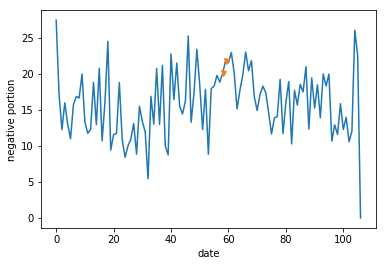

In [17]:
# line chart for the nagative portion
plt.plot(range(107), SA_neg_portion, '-')
plt.plot(range(58,60), SA_neg_portion[58:60], 'v',markersize=5)
plt.xlabel('date')
plt.ylabel('negative portion')
plt.show()

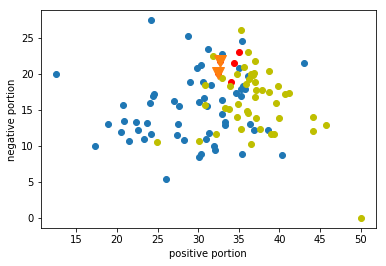

In [18]:
#scatter gram that show the negative and position portion
plt.plot(SA_pos_portion[0:57], SA_neg_portion[0:57], 'o')
plt.plot(SA_pos_portion[57:62], SA_neg_portion[57:62], 'ro')
# the point on the after date
plt.plot(SA_pos_portion[62:107], SA_neg_portion[62:107], 'yo') 
plt.xlabel("positive portion")
plt.ylabel("negative portion")
plt.plot(SA_pos_portion[58:60], SA_neg_portion[58:60], 'v',markersize=12)
plt.show()
# the bule point means the date befor disaster
# the red one means the nearest 4 days before disaster
# the orange triangle point means the disaster day and 

In [19]:
SA_pos_portion[0:59]

array([ 24.17582418,  24.54545455,  22.64150943,  24.        ,
        18.84057971,  31.        ,  20.71428571,  24.375     ,
        30.70175439,  12.5       ,  33.33333333,  31.37254902,
        36.84210526,  28.98550725,  33.33333333,  35.06493506,
        21.42857143,  30.05464481,  35.45454545,  32.0754717 ,
        27.36842105,  24.13793103,  30.58823529,  28.26086957,
        30.12048193,  17.33333333,  23.35766423,  23.75      ,
        30.37974684,  27.5862069 ,  20.89552239,  20.51282051,
        26.08695652,  35.21126761,  27.53623188,  29.87012987,
        36.36363636,  30.3030303 ,  32.        ,  40.35087719,
        32.91139241,  32.87671233,  43.03797468,  31.11111111,
        32.98969072,  27.02702703,  28.73563218,  22.37762238,
        34.69387755,  31.25      ,  31.52173913,  38.59649123,
        35.71428571,  35.37414966,  35.28089888,  35.51745254,
        36.18628068,  34.02172937,  32.43831066])

In [20]:
# the count is the total number of tweet msg in each day 
data_group = df.groupby(['month','day']).count().reset_index()
# data_group['month'] = data_group['month'].astype(int)
# data_group['days'] = data_group['days'].astype(int)
from datetime import datetime
# data_group['date']= data_group.apply(lambda x:datetime.strptime("{0} {1} ".format(x['month'], x['day']), "%Y %m %d"),axis=1)
# # data_group.index= df['date']
# data_group

In [21]:
df1 = df[df['month'] == 'Sep']
df2 = df[df['month'] == 'Oct']
df3 = df[df['month'] == 'Nov']
df4 = df[df['month'] == 'Dec']

frames = [df1, df2,df3,df4]
df = pd.concat(frames)
# a = df1+df2


In [31]:
# customize sort to the month
df['month'] = pd.Categorical(df['month'], ["Sep", "Oct", "Nov","Dec"])

In [33]:
data_group = df.groupby(['month','day']).count().reset_index()

data_group



,month,day,TweetID,replyToTweet,fromUser,toUser,mentions,text,createdAt,latitude,longitude,SA
0,Sep,1.0,91.0,8.0,91.0,13.0,0.0,91.0,91.0,91.0,91.0,91.0
1,Sep,2.0,110.0,15.0,110.0,19.0,0.0,110.0,110.0,110.0,110.0,110.0
2,Sep,3.0,106.0,9.0,106.0,12.0,0.0,106.0,106.0,106.0,106.0,106.0
3,Sep,4.0,100.0,6.0,100.0,6.0,0.0,100.0,100.0,100.0,100.0,100.0
4,Sep,5.0,138.0,13.0,138.0,17.0,0.0,138.0,138.0,138.0,138.0,138.0
5,Sep,6.0,100.0,12.0,100.0,16.0,0.0,100.0,100.0,100.0,100.0,100.0
6,Sep,7.0,140.0,7.0,140.0,7.0,0.0,140.0,140.0,140.0,140.0,140.0
7,Sep,8.0,640.0,39.0,640.0,59.0,0.0,640.0,640.0,640.0,640.0,640.0
8,Sep,9.0,114.0,11.0,114.0,11.0,0.0,114.0,114.0,114.0,114.0,114.0
9,Sep,10.0,40.0,6.0,40.0,8.0,0.0,40.0,40.0,40.0,40.0,40.0


In [40]:
#filter all valid data in ReplyToTweet
df1 = df[df['replyToTweet']!=float('nan')]
data_group_ReplytoTweet = df1.groupby(['month','day']).count()

#filter all valid data in ReplyToUser
df2 = df[df['toUser']!=float('nan')]
data_group_ReplytoUser = df2.groupby(['month','day']).count()

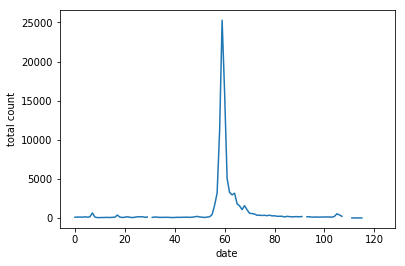

In [36]:
#line chart shows the total number of tweet msg in each day

plt.plot(range(0,124), data_group['TweetID'], '-')
# plt.plot(range(57,62), data_group['TweetID'][57:62], 'ro')
plt.xlabel('date')
plt.ylabel('total count')
plt.show()

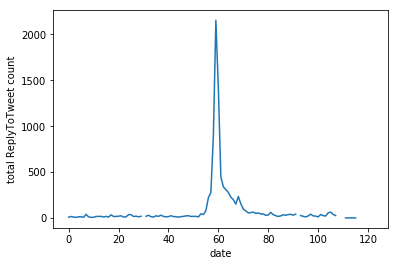

In [38]:
#line chart shows the total number of tweet msg in each day
plt.plot(range(124), data_group_ReplytoTweet['replyToTweet'], '-')
# plt.plot(range(57,62), data_group_ReplytoTweet['ReplyToTweet'][57:62], 'ro')
plt.xlabel('date')
plt.ylabel('total ReplyToTweet count')
plt.show()

#the hill is 10.28

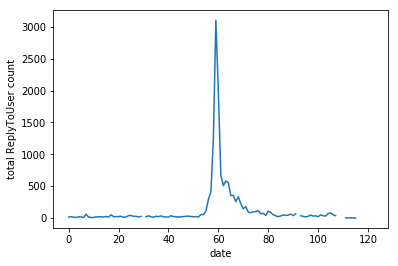

In [42]:
#line chart shows the total number of tweet ReplyToUser msg in each day
plt.plot(range(124), data_group_ReplytoUser['toUser'], '-')
# plt.plot(range(57,62), data_group_ReplytoUser['ReplyToUser'][57:62], 'ro')
plt.xlabel('date')
plt.ylabel('total ReplyToUser count')
plt.show()

In [27]:
#data_group.head(57)

In [28]:
SA_pos_portion[59]

32.640099626400996

In [29]:
SA_pos_portion[61]

35.087719298245617

In [30]:
SA_pos_portion[58]

32.438310661183166

In [22]:
a = df.groupby(['years','month','days']).count()

In [23]:
# Anormly dete